<a href="https://colab.research.google.com/github/War-Eagl/ds-notebooks/blob/master/histopathologic-cancer-detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Histopathologic Cancer Detection
In this notebook we'll do standard computer vision procedure to predict cancer in patches of Whole-Slide-Images in PCam (patch camelyon dataset).  The patches of Whole slide images are easily trainable and can produce comparable results in original camelyon16 dataset. We will use a widely unknown trick called multiple image size training, which widely reduces the nummber of training cycles



In [1]:
from google.colab import files
files.upload()

Saving kaggle.com-cookies.txt to kaggle.com-cookies.txt


{'kaggle.com-cookies.txt': b'# HTTP Cookie File for domains related to kaggle.com.\n# Downloaded with cookies.txt One Click Firefox Extension (https://addons.mozilla.org/en-US/firefox/addon/cookies-txt-one-click/)\n# Example:  wget -x --load-cookies cookies.txt https://www.kaggle.com/c/histopathologic-cancer-detection/data\n#\nwww.kaggle.com\tFALSE\t/signin-google\tTRUE\t1588312761\t.AspNetCore.Correlation.Google.PCUROYTCfh40UXKqkfSsEUMBDfk2YowF3dNj5LZTm1k\tN\nwww.kaggle.com\tFALSE\t/\tFALSE\t1604970852\tka_sessionid\t1a12f34397f8490bed8691ac41830b44\nwww.kaggle.com\tFALSE\t/\tTRUE\t1592979681\t.ASPXAUTH\t876D5D4D76047AA0673C291731E51E728141B8CB1487CF23F50EDA0892150EC0AF4A46500E12788B927B04FFB0985FD8648C9C082B5EB9CD12648DB7CC0A8F2FF3DCAF74803AB2F49D2ABBE820071B666FBBA192\nwww.kaggle.com\tFALSE\t/\tTRUE\t0\tCSRF-TOKEN\tCfDJ8LdUzqlsSWBPr4Ce3rb9VL9naaJa9sWAFqNZKSrtLZ7-QfU8r4bTj0XatgEeaJpQZgDcNLX4xWa3NO7bHaSpXtkBoD4aDGOarYePUfWzeRHGUs50GiRvZea6kkknF6HGxFk-UqsiyELFEOpFKmlreRo\nwww.kaggle.co

Since the Dataset is very large, we'll download it in alternative method by using cookies in kaggle

In [2]:
!wget -x --load-cookies kaggle.com-cookies.txt "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/11848/862157/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1590733604&Signature=RB8hFZ1t0fVm7AaThN2fFBM3pTRYgdUogIVzxzgThAF8EY9HFwkxweUrGRQmewEHpscZpFe4Oj1OfgCL4qpX5%2FFltYABrbNg6JLwKTHttA0yKd2Atka4DpSq2UA2PcL%2FlXxZDIYGYrzdBc3gqy5uxDZJ6eoURRIxv5f7pH91eIZASlGwZ4W5b5LtSz4330Ks%2FPbfSqc5XHVi7NtwXu2c9uTeTJcdKhjaC5GON9SZAINKFwfqpGlYGKoCkVOYulrUNFRuV63%2Bax51%2BUJcbKi9SQXnTa0TqLAKheQashBrApNRjcBiMcVRl%2BWd%2F%2B%2F2%2FGHgof35wizlc1RLlL6R%2Ba1Frg%3D%3D&response-content-disposition=attachment%3B+filename%3Dhistopathologic-cancer-detection.zip" -O data.zip

--2020-05-26 07:11:19--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/11848/862157/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1590733604&Signature=RB8hFZ1t0fVm7AaThN2fFBM3pTRYgdUogIVzxzgThAF8EY9HFwkxweUrGRQmewEHpscZpFe4Oj1OfgCL4qpX5%2FFltYABrbNg6JLwKTHttA0yKd2Atka4DpSq2UA2PcL%2FlXxZDIYGYrzdBc3gqy5uxDZJ6eoURRIxv5f7pH91eIZASlGwZ4W5b5LtSz4330Ks%2FPbfSqc5XHVi7NtwXu2c9uTeTJcdKhjaC5GON9SZAINKFwfqpGlYGKoCkVOYulrUNFRuV63%2Bax51%2BUJcbKi9SQXnTa0TqLAKheQashBrApNRjcBiMcVRl%2BWd%2F%2B%2F2%2FGHgof35wizlc1RLlL6R%2Ba1Frg%3D%3D&response-content-disposition=attachment%3B+filename%3Dhistopathologic-cancer-detection.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.71.128, 2a00:1450:400c:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.71.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6773228425 (6.3G) [application/zip]
Saving to: ‘data.zip’

data.zip        

In [0]:
!cp data.zip "/content/drive/My Drive"

In [3]:
!unzip data.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/fa2c657eff58b6802cb32843caa2fac25b67c2c9.tif  
  inflating: train/fa2c775c4457d0aeb7e57216849eef5f4e72e566.tif  
  inflating: train/fa2c77e1707c2fe7b0016e00736fb6e4b7f09488.tif  
  inflating: train/fa2ce5e802dd281bd98fcfb538e80b9c96c2b7af.tif  
  inflating: train/fa2d24e4a109d2d3a925890aaed4e0f038dfffb0.tif  
  inflating: train/fa2d7e4865aa7869d2dd85116323b8405c94f1c2.tif  
  inflating: train/fa2d8b2e4acf46e278e2e7acbc034c263d970737.tif  
  inflating: train/fa2df9148831509a181797db79eb1a7bf39593f1.tif  
  inflating: train/fa2e6db0b35484797f58005e3a6e24ca75fbca76.tif  
  inflating: train/fa2e80e84594465329bdc0c8d1b3a507275fbb4d.tif  
  inflating: train/fa2eaf8ec6267fa928a88775dc15ee25b633c537.tif  
  inflating: train/fa2ebf31ff5954570526d4835ac5368fabc1f035.tif  
  inflating: train/fa2efd2dda5235a3e397ea0dd637ea13a78f7599.tif  
  inflating: train/fa2f1d5e86165f63c57acdf9d23521f2b8070e0c.tif  
  inflating: train/fa2ffa

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
tfms=get_transforms(do_flip=True,flip_vert=True)

Fastai's ImageDataBunch provides several feauters out-of-the box and in very compact way.

In [0]:
data=ImageDataBunch.from_csv('/content',ds_tfms=tfms,size=50,suffix='.tif',folder='train',test='test',csv_labels='train_labels.csv',bs=64)

In [10]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (176020 items)
x: ImageList
Image (3, 50, 50),Image (3, 50, 50),Image (3, 50, 50),Image (3, 50, 50),Image (3, 50, 50)
y: CategoryList
1,0,0,0,1
Path: /content;

Valid: LabelList (44005 items)
x: ImageList
Image (3, 50, 50),Image (3, 50, 50),Image (3, 50, 50),Image (3, 50, 50),Image (3, 50, 50)
y: CategoryList
0,0,0,0,0
Path: /content;

Test: LabelList (57458 items)
x: ImageList
Image (3, 50, 50),Image (3, 50, 50),Image (3, 50, 50),Image (3, 50, 50),Image (3, 50, 50)
y: EmptyLabelList
,,,,
Path: /content

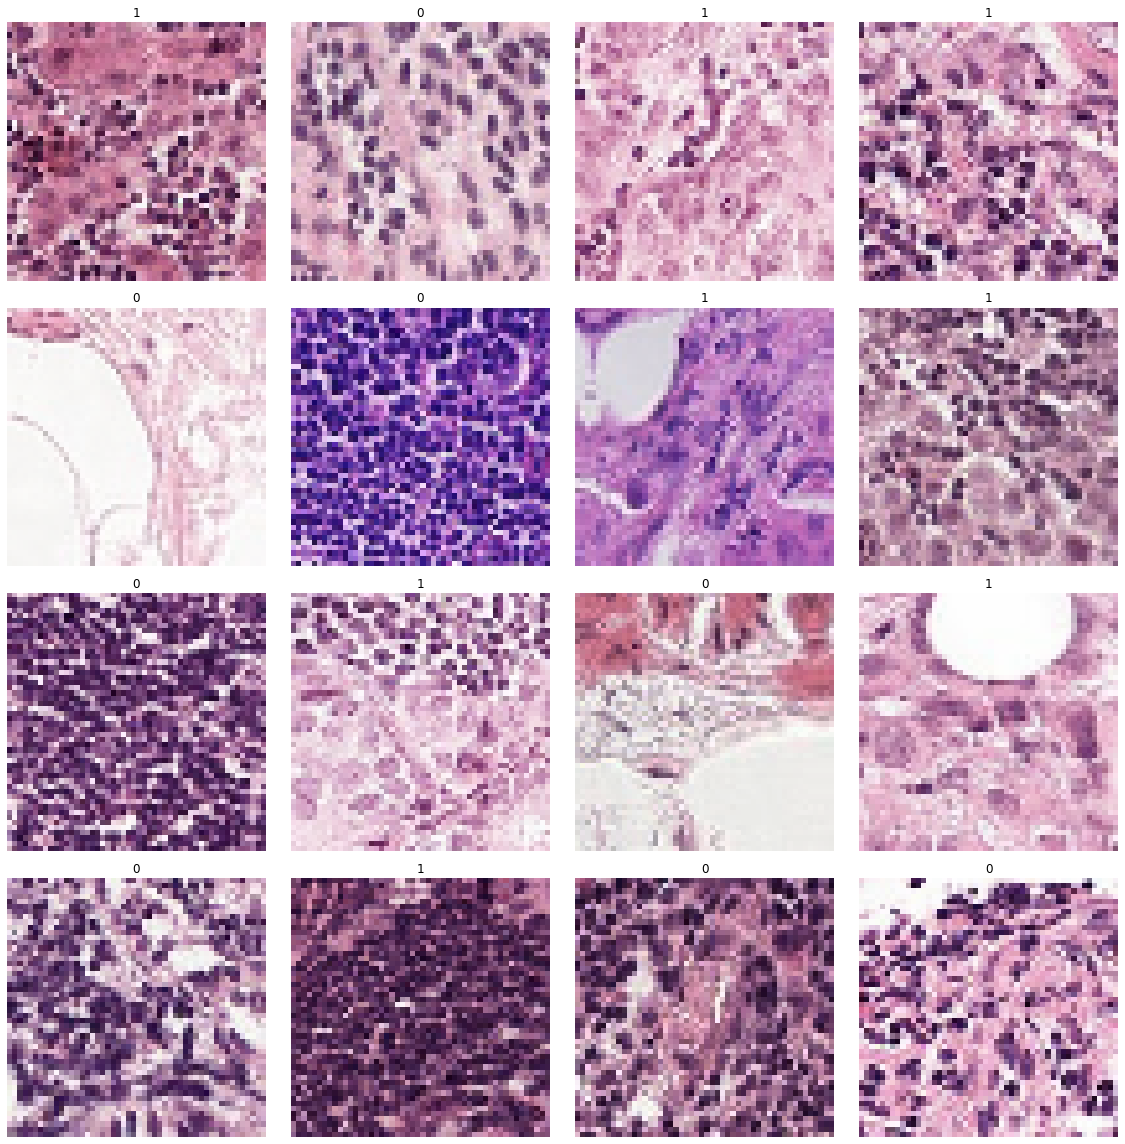

In [11]:
data.show_batch(rows=4, fig_size=(10,10))

Resnet18 model pretrained in imagenet dataset

In [0]:
learn=cnn_learner(data,models.resnet18,metrics=error_rate)

In [19]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


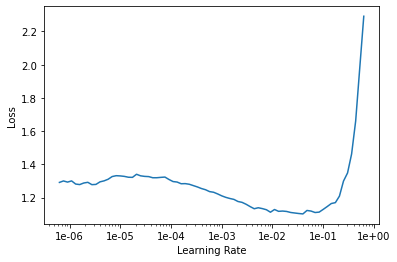

In [20]:
learn.recorder.plot()

Freezing all the other layers except the last so that they can be fine tuned

In [0]:
learn.freeze()

In [22]:
learn.fit_one_cycle(5,slice(1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.431302,0.403352,0.184093,08:01
1,0.375117,0.340530,0.148710,08:30
2,0.350581,0.314828,0.134962,08:06
3,0.329963,0.308508,0.132326,07:58
4,0.335663,0.303404,0.130031,08:20


In [23]:
learn.unfreeze()
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


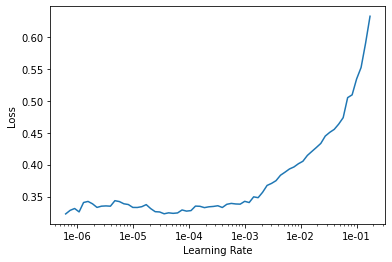

In [24]:
learn.recorder.plot()

In [25]:
learn.fit_one_cycle(2,slice(1e-05))

epoch,train_loss,valid_loss,error_rate,time
0,0.332043,0.309029,0.132826,08:08
1,0.333257,0.298563,0.127486,08:38


In [0]:
learn.save('resnet18-stage1')

After fitting few cycles in 50x50 image size, now the model is trained with same images but in the size of 100x100. Its like free data augmentation since 50x50 is different from 100x100 image

In [0]:
data=ImageDataBunch.from_csv('/content',ds_tfms=tfms,size=100,suffix='.tif',folder='train',test='test',csv_labels='train_labels.csv',bs=64)

In [0]:
learn.data=data

In [30]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.202310,0.188806,0.069538,12:08
1,0.147402,0.129093,0.047722,12:08


In [0]:
learn.save('resnet18-stage2')

Again changing the image size to 224x224.

In [0]:
data=ImageDataBunch.from_csv('/content',ds_tfms=tfms,size=224,suffix='.tif',folder='train',test='test',csv_labels='train_labels.csv',bs=64)

In [0]:
learn.data=data

In [0]:
learn.freeze()

In [36]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.192498,0.157719,0.059448,29:20


In [0]:
learn.unfreeze()

In [38]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.126057,0.107194,0.036837,31:37


In [0]:
learn.save("resnet18-stage3")

In [40]:
preds,y,loss=learn.get_preds(with_loss=True)
accuracy(preds,y)

tensor(0.9632)

The accuracy is 96.32%

In [41]:
interp=ClassificationInterpretation.from_learner(learn)
losses,idx=interp.top_losses()
len(data.valid_ds)==len(losses)==len(idx)

True

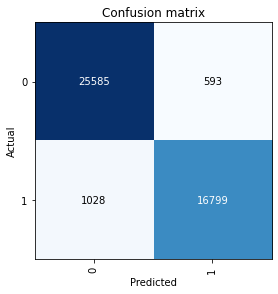

In [42]:
interp.plot_confusion_matrix()

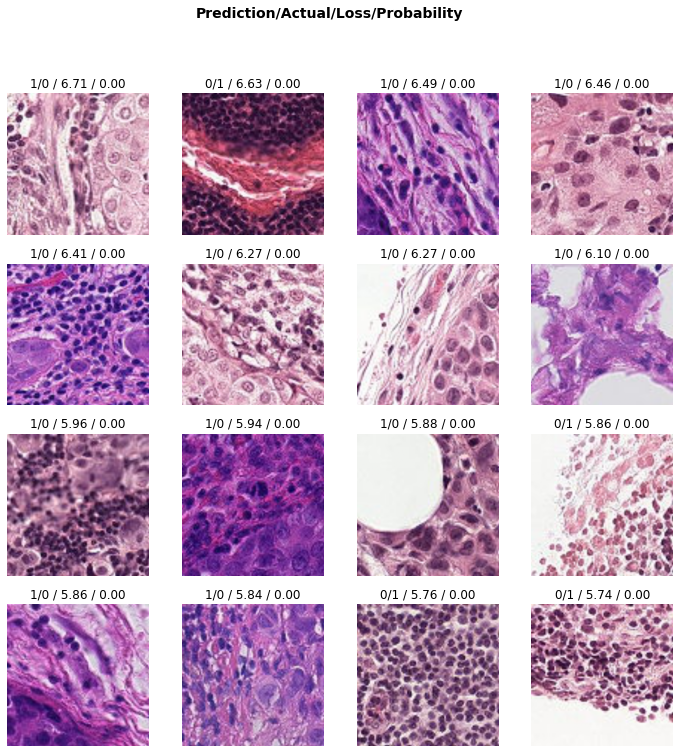

In [44]:
interp.plot_top_losses(16)

In this [blog](https://towardsdatascience.com/histopathological-cancer-detection-with-deep-neural-networks-3399be879671) they have used resnet50 architecture and trained it for 60 cycles for 11 hours to get an accuracy of 98%. But we have trained in a shallower architecture 11 cycles(2 hours approx.) to get comparable result (96.32%). Thats the power of Mixed image size training.

# References



*   [Histopathological cancer detection with deep neural networks](https://towardsdatascience.com/histopathological-cancer-detection-with-deep-neural-networks-3399be879671)
*   B. S. Veeling, J. Linmans, J. Winkens, T. Cohen, M. Welling. "Rotation Equivariant CNNs for Digital Pathology". arXiv:1806.03962

